# WebMapService

In [1]:
from owslib.wms import WebMapService
wms = WebMapService('http://wms.swisstopo.admin.ch/', version='1.3.0', username="user_brl6a", password="58wbytpjt1a2gz4m")
print('{} (type: {}) contains {} layers'.format(wms.identification.title, wms.identification.type, len(wms.contents)))

swisstopo WMS (type: WMS) contains 103 layers


In [2]:
for layer_key,layer in wms.contents.items():
    print('{}: {}'.format(layer_key, layer.title))

WMS-SWISSTOPOWMS: swisstopo WMS
ch.swisstopo.swissbathy3d-reliefschattierung: swissBATHY3D Reliefschattierung
ch.swisstopo.swissbathy3d-reliefschattierung_getfeatureinfo: swissBATHY3D Reliefschattierung - ch.swisstopo.swissbathy3d-reliefschattierung_getfeatureinfo
ch.swisstopo.swissbathy3d-reliefschattierung_getmap: swissBATHY3D Reliefschattierung - ch.swisstopo.swissbathy3d-reliefschattierung_getmap
ch.swisstopo.swisstlm3d-eisenbahnnetz: Eisenbahn swissTLM3D
ch.swisstopo.swisstlm3d-gewaessernetz: Gewässer swissTLM3D
ch.swisstopo.swisstlm3d-gewaessernetz_lake: Gewässer swissTLM3D - ch.swisstopo.swisstlm3d-gewaessernetz_lake
ch.swisstopo.swisstlm3d-gewaessernetz_line: Gewässer swissTLM3D - ch.swisstopo.swisstlm3d-gewaessernetz_line
ch.swisstopo.swisstlm3d-strassen: Strassen und Wege swissTLM3D
ch.swisstopo.swisstlm3d-strassen_strasse: Strassen und Wege swissTLM3D - ch.swisstopo.swisstlm3d-strassen_strasse
ch.swisstopo.swisstlm3d-strassen_aus_einfahrt: Strassen und Wege swissTLM3D - ch.s

title               : Landeskarten (farbig)
boundingBox         : (2100010.0, 1050000.0, 2850100.0, 1400170.0, 'EPSG:2056')
boundingBoxWGS84    : (0.659866, 45.4195, 10.8359, 48.7511)
styles              : {}


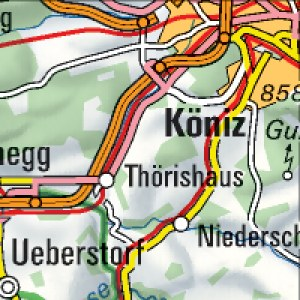

In [3]:
# Specify the layer you want to view
# layer = 'ch.swisstopo.vec200-transportation-railway'
layer = 'ch.swisstopo.pixelkarte-farbe'

attrs = ['title', 'boundingBox', 'boundingBoxWGS84', 'styles']

for attr in attrs:
    print('{}: {}'.format(attr.ljust(20), getattr(wms[layer], attr)))
# usually always 'default'
# style = next(iter(wms[layer].styles))
img = wms.getmap(layers=[layer],
                 styles=['default'],
                 srs='EPSG:2056',
                 bbox=(2590000, 1190000, 2600000, 1200000),
                 size=(300, 300),
                 format='image/jpeg',
                 transparent=True
)
# print(img)
img_data = img.read()

from IPython.core.display import Image, display
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
    
display(Image(data=img_data, format='jpg', unconfined=True))


# WebMapTileService WMTS

WMTS BGDI (type: OGC WMTS, version: 1.0.0)
fetching https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/22/277/245.jpeg


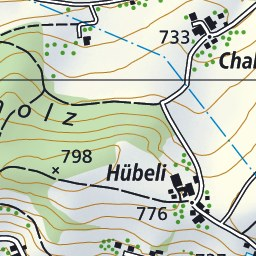

In [4]:
# Note: KVP encoding (key-value-pair as in /?service=WMTS&request=GetCapabilities&version=1.3.0)
# is not implemented/supported by wmts.geo.admin.ch
from owslib.wmts import WebMapTileService
from owslib.util import openURL
from IPython.core.display import Image, display
# wmts = WebMapTileService('https://wmts1.geo.admin.ch/')
username = 'user_brl6a'
pw = '58wbytpjt1a2gz4m'
wmts = WebMapTileService('https://wmts.geo.admin.ch/EPSG/2056/1.0.0/WMTSCapabilities.xml', username=username, password=pw)
print("{} (type: {}, version: {})".format(wmts.identification.title, wmts.identification.type, wmts.identification.version))
layer = 'ch.swisstopo.pixelkarte-farbe'
# # Note: OWSlib doesn't correctly handle "custom" parameters like 'time', hence we have to use a workaround here
# tile = wmts.gettile(layer=layer,
#                     time='current',
#                     tilematrixset='2056',
#                     tilematrix='22',
#                     row='277',
#                     column='245',
#                     format="image/jpeg",
#                 )

## NOTE2: row and col are switched between 2056 and 21781
url = wmts.buildTileResource(layer=layer,
                    style='default',
                    tilematrixset='2056',
                    tilematrix='22',
                    column='277',         
                    row='245',
                    format="image/jpeg"
                )

# Note: this url still contains the parameter '{Time}'
# that has to be replaced with 'current'
resurl = url.replace('{Time}', 'current')

print("fetching {}".format(resurl))

tile = openURL(resurl, username=username, password=pw)

display(Image(data=tile.read(), format='jpg', unconfined=True))

fetching https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/22/277/245.jpeg


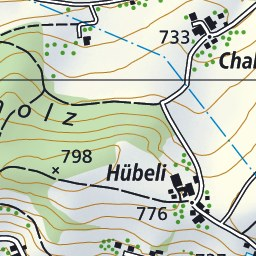

In [5]:
import requests
from IPython.core.display import Image, display
wmts_url = "{scheme}://{servername}/{protocolversion}/{layername}/{stylename}/{time}/{tilematrixset}/{tilesetid}/{tilerow}/{tilecol}.{formatext}"
def get_wmts_url(scheme='https', servername='wmts.geo.admin.ch', protocolversion='1.0.0', layername=None, stylename='default', time='current', tilematrixset='2056', tilesetid=None, tilerow=None, tilecol=None, formatext='jpeg'):
    return wmts_url.format(
        scheme=scheme,
        servername=servername,
        protocolversion=protocolversion,
        layername=layername,
        stylename=stylename,
        time=time,
        tilematrixset=tilematrixset,
        tilesetid=tilesetid,
        tilerow=tilerow,
        tilecol=tilecol,
        formatext=formatext
    )
url = get_wmts_url(layername='ch.swisstopo.pixelkarte-farbe', tilesetid=22, tilerow=277, tilecol=245)
print('fetching {}'.format(url))
resp = requests.get(url, headers={'referer': "https://ltboc.geo.admin.ch"})
display(Image(data=resp.content, format='jpg', unconfined=True))
RenderJSON(resp.headers.copy())

# Alti Service

In [13]:
headers = {'referer': "http://ltboc.geo.admin.ch"}
base_url = 'https://api3.geo.admin.ch/rest/services/height?easting={easting}&northing={northing}'
easting = "2597798.2"
northing = "1193085.1"
url = base_url.format(easting=easting, northing=northing)
resp = requests.get(url, headers=headers)
RenderJSON(resp.json(), height=80)

# Profile Service

fetching https://api3.geo.admin.ch/rest/services/profile.json?geom=%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B2597764.000562072%2C%201192687.0009914723%5D%2C%20%5B2597790.000562082%2C%201192739.0009914935%5D%2C%20%5B2597688.000561937%2C%201192941.0009916169%5D%2C%20%5B2597750.0005619815%2C%201192987.0009916283%5D%2C%20%5B2597752.000561964%2C%201193061.0009916658%5D%2C%20%5B2597800.000561995%2C%201193109.0009916753%5D%2C%20%5B2597848.000562033%2C%201193129.000991674%5D%2C%20%5B2597966.000562116%2C%201193221.0009916872%5D%2C%20%5B2598028.0005621556%2C%201193285.0009917093%5D%2C%20%5B2598226.0005623307%2C%201193299.0009916592%5D%2C%20%5B2598326.0005624066%2C%201193355.0009916648%5D%2C%20%5B2598378.0005624536%2C%201193355.0009916548%5D%2C%20%5B2598464.0005625277%2C%201193369.0009916336%5D%5D%7D&sr=2056&nb_points=50
we received 51 points


<IPython.core.display.Javascript object>


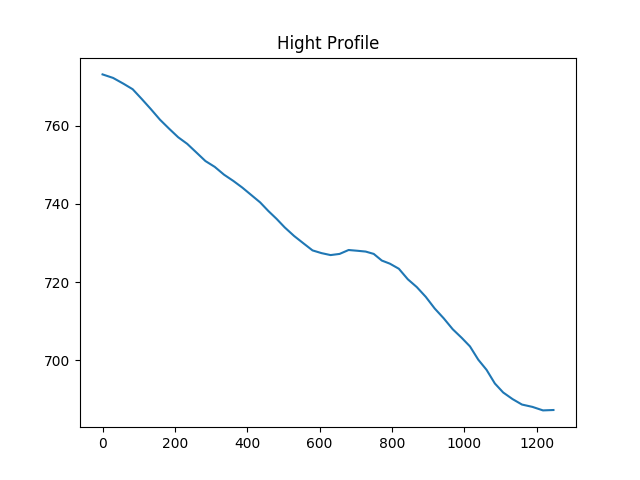

In [14]:
import pyproj
import urllib
import json
import requests
coords = [(7.409297165334214,46.88529671006229),
          (7.409638025879345,46.88576455384367),
          (7.408298712384686,46.88758123943866),
          (7.409111955047305,46.88799524126988),
          (7.409137819428239,46.88866089781779),
          (7.409767381399114,46.889092836396266),
          (7.410397090248652,46.889272904119686),
          (7.411944944323117,46.89010085291048),
          (7.41275817238657,46.890676743352145),
          (7.41535614419583,46.89080325685955),
          (7.41666806817831,46.89130726188685),
          (7.417350386721804,46.89130739655902),
          (7.418478787181435,46.891433543998204)]
proj_wgs84 = pyproj.Proj(init='EPSG:4326')
proj_lv95 = pyproj.Proj(init='EPSG:2056')
lv95_coords = []
# x1, y1 = p1(-92.199881,38.56694)
# transform this point to projection 2 coordinates.
# x2, y2 = transform(p1,p2,x1,y1)
for x0, y0 in coords:
    x2, y2 = pyproj.transform(proj_wgs84, proj_lv95, x0, y0)
    lv95_coords.append((x2, y2))
# print(lv95_coords)
base_url = "https://api3.geo.admin.ch/rest/services/profile.json?geom={geom}&sr=2056&nb_points={nb_points}"
# {
#     "type": "Point",
#     "coordinates": [125.6, 10.1]
#   }
geo = {
    "type":"LineString",
    "coordinates":lv95_coords
}
geojson = json.dumps(geo)
urlencgeojson = urllib.parse.quote(geojson)
url = base_url.format(geom=urlencgeojson, nb_points=50)
print('fetching {}'.format(url))
resp = requests.get(url, headers=headers)
if resp.status_code != 200:
    print(repr(resp), resp.text)
result = resp.json()
# print(result)
x = [p['dist'] for p in result]
y = [p['alts']['DTM25'] for p in result]
print("we received {} points".format(len(x)))
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title('Hight Profile')
plt.show()


In [16]:
location = "chaltebruenne"
url = "https://api3.geo.admin.ch/rest/services/api/SearchServer?searchText={location}&type=locations"
resp = requests.get(url.format(location=location), headers=headers)
RenderJSON(resp.json()["results"][0]["attrs"])
# s = requests.Session()
# s.headers.update({'referer': my_referer})
# s.get(url)